In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


In [3]:
from IPython.display import display

# Exercise 1: Linear Model Interpretation (Basics)

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Extract and interpret the model coefficients
coefficients = linear_model.coef_
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("Linear Regression Coefficients:")
display(coefficients_df)

# Calculate feature importance using standardized coefficients
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linear_model.fit(X_scaled, y)
standardized_coefficients = linear_model.coef_
standardized_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Standardized Coefficient': standardized_coefficients})
print("\nFeature Importance (Standardized Coefficients):")
display(standardized_coefficients_df)

# Compare with Lasso regression results (feature selection)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_scaled, y)
lasso_coefficients = lasso_model.coef_
lasso_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Lasso Coefficient': lasso_coefficients})
print("\nLasso Regression Coefficients:")
display(lasso_coefficients_df)


Linear Regression Coefficients:


,Feature,Coefficient
0,MedInc,0.436693
1,HouseAge,0.009436
2,AveRooms,-0.107322
3,AveBedrms,0.645066
4,Population,-0.000004
5,AveOccup,-0.003787
6,Latitude,-0.421314
7,Longitude,-0.434514



Feature Importance (Standardized Coefficients):


,Feature,Standardized Coefficient
0,MedInc,0.829619
1,HouseAge,0.118752
2,AveRooms,-0.265527
3,AveBedrms,0.305696
4,Population,-0.004503
5,AveOccup,-0.039326
6,Latitude,-0.899886
7,Longitude,-0.870541



Lasso Regression Coefficients:


,Feature,Lasso Coefficient
0,MedInc,0.705713
1,HouseAge,0.106011
2,AveRooms,-0.000000
3,AveBedrms,-0.000000
4,Population,-0.000000
5,AveOccup,-0.000000
6,Latitude,-0.011213
7,Longitude,-0.000000


# Discussion of Results: Exercise 1

In this exercise, we analyzed the California housing dataset using linear regression and Lasso regression to interpret feature 
importance and compare the results.

## Linear Regression Coefficients
The coefficients obtained from the linear regression model indicate the relationship between each feature and the target variable (`MedHouseVal`). A positive coefficient suggests a direct relationship, while a negative coefficient indicates an inverse relationship. For example:
- `MedInc` (Median Income) has the highest positive coefficient (0.4367), indicating that higher median income is strongly associated with higher housing prices.
- `Latitude` and `Longitude` have negative coefficients, suggesting that geographic location plays a significant role in determining housing prices.

## Standardized Coefficients
By standardizing the features, we calculated the standardized coefficients to better compare the relative importance of each feature. The results show:
- `MedInc` remains the most influential feature with a standardized coefficient of 0.8296.
- `Latitude` and `Longitude` have the largest negative standardized coefficients, highlighting their strong inverse relationship with housing prices.

## Lasso Regression Coefficients
Lasso regression introduces regularization, which helps in feature selection by shrinking less important coefficients to zero. The results show:
- `MedInc` and `HouseAge` are retained as important features with non-zero coefficients.
- Features like `AveRooms`, `AveBedrms`, `Population`, and `AveOccup` are eliminated (coefficients set to zero), indicating they have minimal impact on predicting housing prices.

## Comparison and Insights
- Both linear regression and Lasso regression identify `MedInc` as the most significant feature.
- Lasso regression simplifies the model by reducing the number of features, which can be beneficial for interpretability and avoiding overfitting.
- The standardized coefficients provide a clearer understanding of the relative importance of features, especially when the features have different scales.

Overall, this analysis highlights the importance of feature selection and scaling in building interpretable and effective predictive models.

# Exercise 2: Decision Tree Analysis


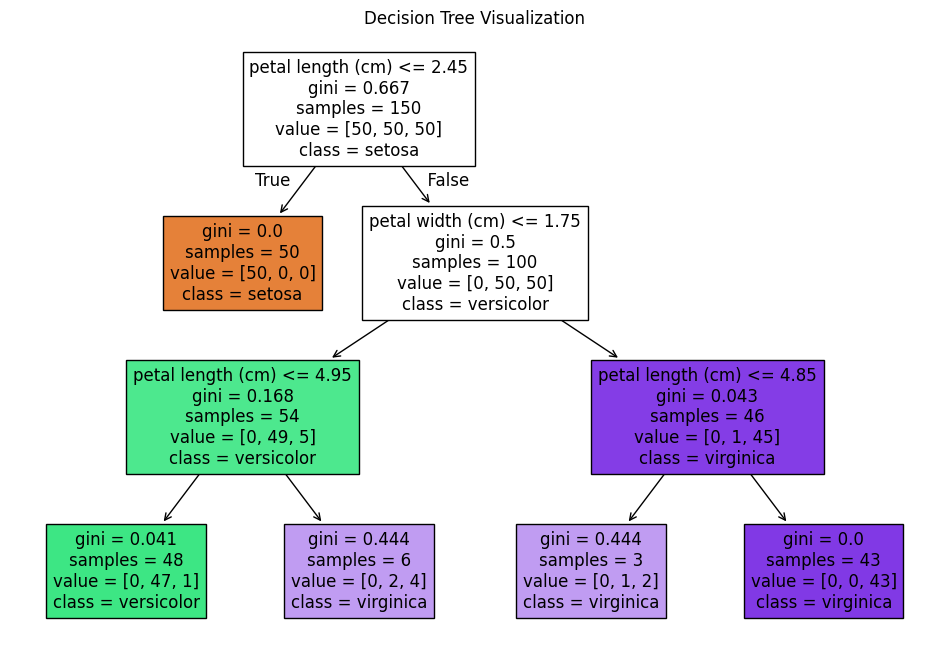

Feature Importance:


,Feature,Importance
2,petal length (cm),0.585616
3,petal width (cm),0.414384
1,sepal width (cm),0.000000
0,sepal length (cm),0.000000


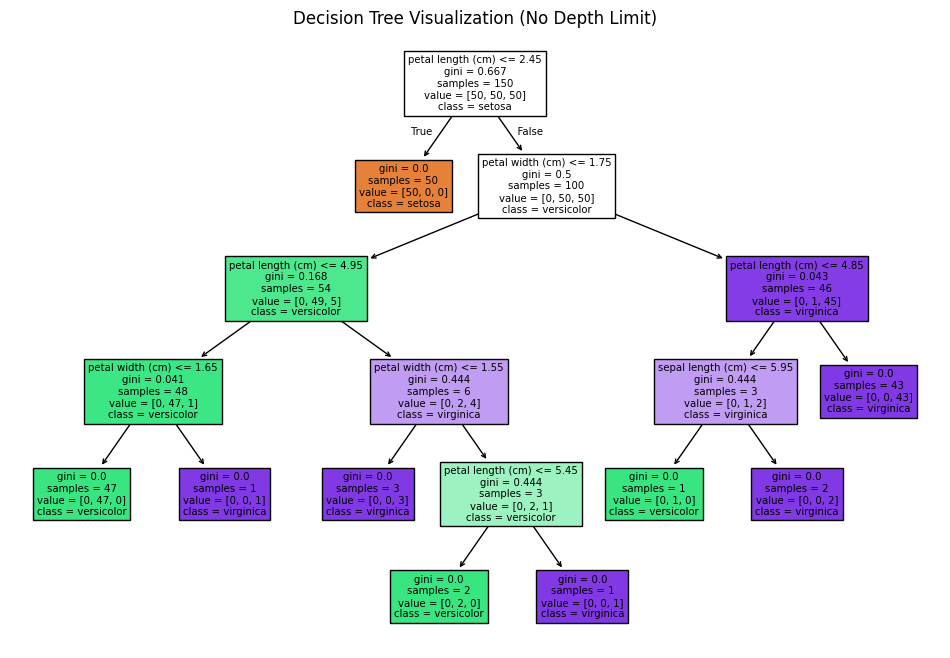

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Load the iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
feature_names_iris = iris.feature_names
class_names_iris = iris.target_names

# Train a decision tree classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_iris, y_iris)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=feature_names_iris, class_names=class_names_iris, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Extract and interpret feature importance values
feature_importances = tree_model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': feature_names_iris, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
display(feature_importances_df)

# Modify tree depth and analyze impact on interpretability
tree_model_deep = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_model_deep.fit(X_iris, y_iris)

plt.figure(figsize=(12, 8))
plot_tree(tree_model_deep, feature_names=feature_names_iris, class_names=class_names_iris, filled=True)
plt.title("Decision Tree Visualization (No Depth Limit)")
plt.show()

# Discussion of Results: Exercise 2

In this exercise, we analyzed the Iris dataset using a Decision Tree Classifier to understand feature importance and the impact of tree depth on interpretability.

## Decision Tree Visualization
The decision tree was visualized with a maximum depth of 3 and without any depth limit:
- **Max Depth = 3**: The tree is compact and interpretable, focusing on the most important splits in the data. This makes it easier to understand the decision-making process.
- **No Depth Limit**: The tree becomes more complex, capturing finer details in the data. However, this can lead to overfitting, reducing generalization to unseen data.

## Feature Importance
The feature importance values indicate the relative contribution of each feature to the decision-making process:
- `petal length (cm)` has the highest importance (0.5856), followed by `petal width (cm)` (0.4144). These features are critical for distinguishing between classes.
- `sepal length (cm)` and `sepal width (cm)` have zero importance, suggesting they do not contribute significantly to the classification in this model.

## Insights
- The decision tree effectively identifies the most relevant features (`petal length` and `petal width`) for classifying the Iris species.
- Limiting the tree depth improves interpretability but may sacrifice some accuracy. Conversely, removing the depth limit increases complexity and the risk of overfitting.
- Feature importance analysis helps in understanding which features drive the model's predictions, aiding in feature selection and model refinement.

Overall, this exercise highlights the trade-off between model complexity and interpretability, as well as the importance of feature selection in building effective decision tree models.


# Exercise 3: Model Comparison

## Linear Regression vs. Decision Tree
### Interpretability:
- **Linear Regression**:
    - Provides a global explanation of the relationship between features and the target variable through coefficients.
    - Coefficients indicate the direction and magnitude of the impact of each feature on the target.
    - Assumes a linear relationship, which may not capture complex patterns in the data.
    - Easy to interpret for small datasets with fewer features.

- **Decision Tree**:
    - Offers a hierarchical, rule-based explanation of the decision-making process.
    - Splits are intuitive and provide local explanations for specific regions of the feature space.
    - Can capture non-linear relationships and interactions between features.
    - Becomes less interpretable as the tree depth increases.

### Trade-offs:
- Linear regression is more interpretable for simple, linear relationships.
- Decision trees are better for capturing complex patterns but may sacrifice interpretability for deeper trees.

---

## Global vs. Local Explanations
### Interpretability:
- **Global Explanations**:
    - Provide an overall understanding of the model's behavior across the entire dataset.
    - Examples: Linear regression coefficients, feature importance in decision trees.
    - Useful for understanding the general trends and relationships in the data.

- **Local Explanations**:
    - Focus on explaining individual predictions or specific regions of the feature space.
    - Examples: Decision tree paths for a single instance, SHAP values, LIME.
    - Useful for debugging and understanding specific predictions.

### Trade-offs:
- Global explanations are easier to communicate but may miss nuances in individual predictions.
- Local explanations provide detailed insights but can be computationally expensive and harder to generalize.

---

## Model-Specific vs. Model-Agnostic Methods
### Interpretability:
- **Model-Specific Methods**:
    - Tailored to specific models and leverage their internal structure.
    - Examples: Coefficients in linear regression, feature importance in decision trees.
    - Efficient and accurate but limited to the model they are designed for.

- **Model-Agnostic Methods**:
    - Applicable to any model, treating it as a black box.
    - Examples: SHAP, LIME, Partial Dependence Plots.
    - Flexible and allow comparison across models but may require more computation.

### Trade-offs:
- Model-specific methods are faster and more precise but lack flexibility.
- Model-agnostic methods are versatile but may introduce approximation errors.

---

## Insights:
- The choice of interpretability method depends on the use case and audience.
- Linear regression is ideal for simple, global explanations, while decision trees excel in providing local, rule-based insights.
- Combining global and local explanations, as well as model-specific and model-agnostic methods, can provide a comprehensive understanding of the model's behavior.